<a href="https://colab.research.google.com/github/haticeyyildiz/Deep-Learning/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [9]:
x_train[4].shape

(28, 28)

In [11]:
x_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 189, 206, 187,  32,   0,
          0,   0,  26, 217, 226, 196,  11,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 192, 227, 234, 243, 230,
        147, 239, 242, 234, 218, 209,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 173, 225, 215, 233, 254,
          0, 194, 240, 217, 221, 190,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 139, 229, 212, 226, 255,
          0, 162, 255, 213, 226, 200,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  98, 232, 211, 215, 249,
         46, 162, 246, 214, 230, 186,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

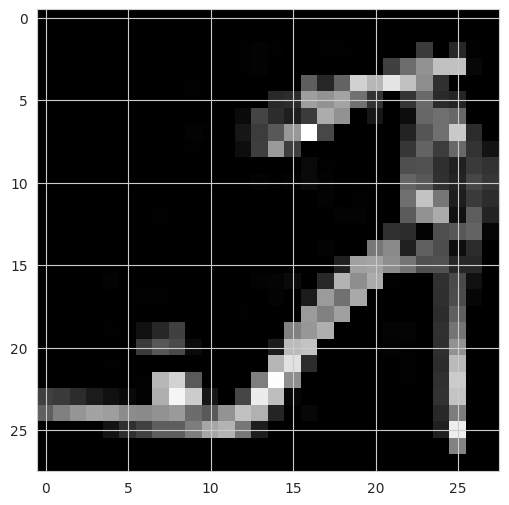

In [15]:
plt.imshow(x_train[8],cmap='gray')

<Axes: >

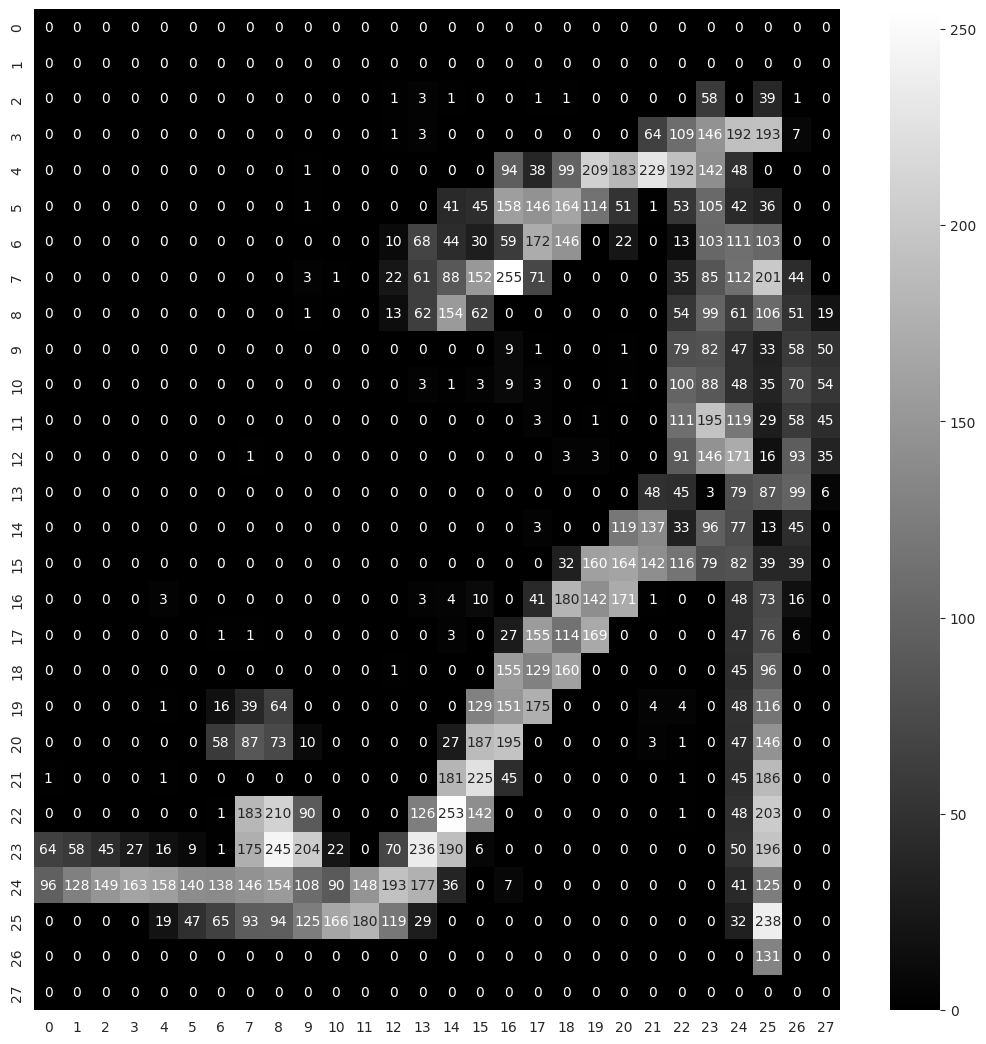

In [16]:
plt.figure(figsize=(13, 13))
sns.heatmap(x_train[8], annot=True, cmap="gray", fmt=".3g")

In [17]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [18]:
y_train[8]

5

In [20]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [21]:
y_train[0]

9

In [23]:
classes[int(y_train[0])]

'Ankle boot'

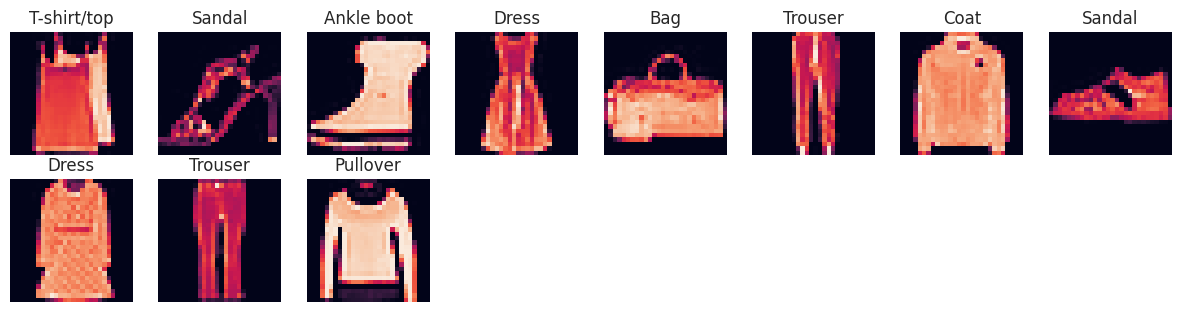

In [26]:
plt.figure(figsize=(15, 15))
for i in range(11):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [27]:
x_train[8].min()

0

In [29]:
x_train[8].max()

255

In [30]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 
x_test /= 255

In [32]:
x_train[8].min()

0.0

In [33]:
x_train[8].max()

1.0

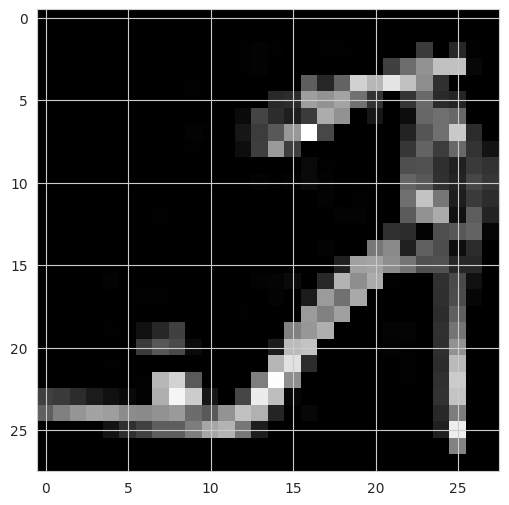

In [34]:
plt.imshow(x_train[8],cmap='gray')

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [35]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train.reshape(60000, 28, 28, 1).shape

In [36]:
X_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [37]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [38]:
from tensorflow.keras.utils import to_categorical

In [39]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [40]:
y_train[8]

5

In [41]:
Y_train[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [43]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 20412)             0         
                                                                 
 dense (Dense)               (None, 128)               2612864   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [47]:
model.fit(X_train, Y_train, batch_size=25, epochs=60, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/60
2400/2400 [==============================] - 19s 4ms/step - loss: 0.3897 - accuracy: 0.8611 - val_loss: 0.3036 - val_accuracy: 0.8904
Epoch 2/60
2400/2400 [==============================] - 10s 4ms/step - loss: 0.2613 - accuracy: 0.9054 - val_loss: 0.2859 - val_accuracy: 0.9008
Epoch 3/60
2400/2400 [==============================] - 9s 4ms/step - loss: 0.2234 - accuracy: 0.9202 - val_loss: 0.2938 - val_accuracy: 0.9058
Epoch 4/60
2400/2400 [==============================] - 10s 4ms/step - loss: 0.2009 - accuracy: 0.9278 - val_loss: 0.3106 - val_accuracy: 0.9005


**TASK 7: Plot values of metrics you used in your model.**

In [48]:
X_train.shape

(60000, 28, 28, 1)

In [49]:
Y_train.shape

(60000, 10)

In [50]:
model.metrics_names

['loss', 'accuracy']

In [51]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.390,0.861,0.304,0.890
1,0.261,0.905,0.286,0.901
2,0.223,0.920,0.294,0.906
3,0.201,0.928,0.311,0.900


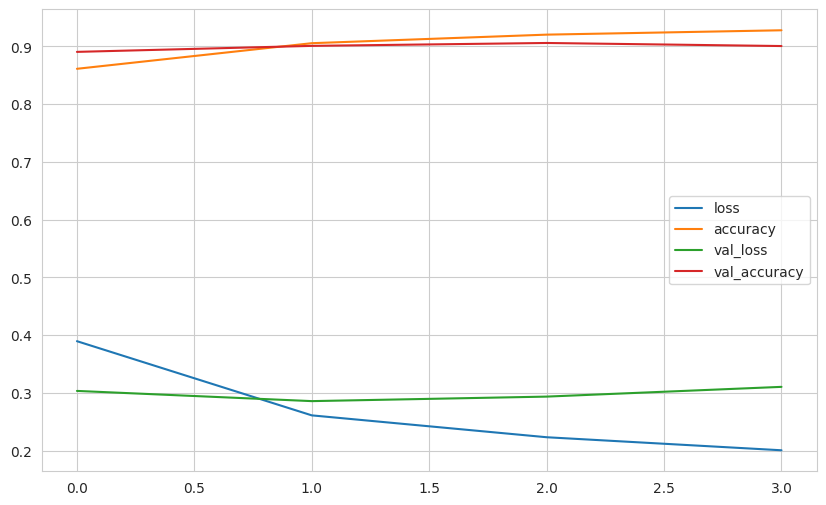

In [52]:
summary.plot();

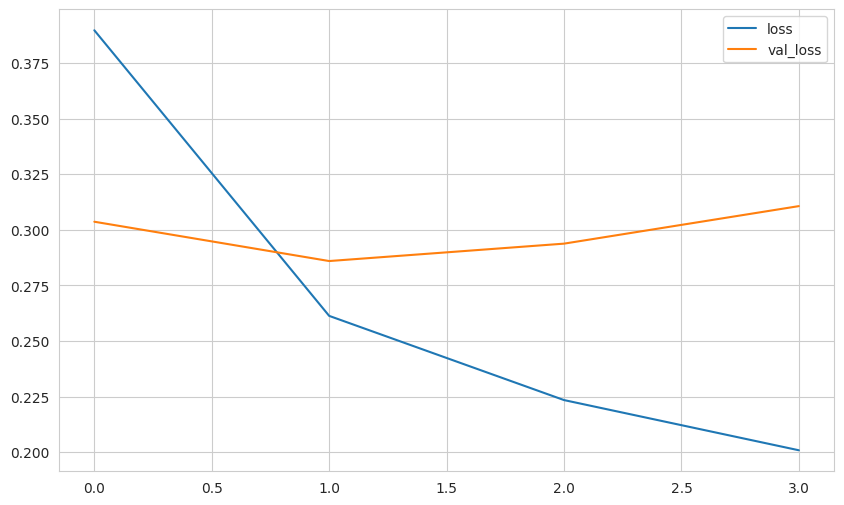

In [53]:
summary[["loss", "val_loss"]].plot();

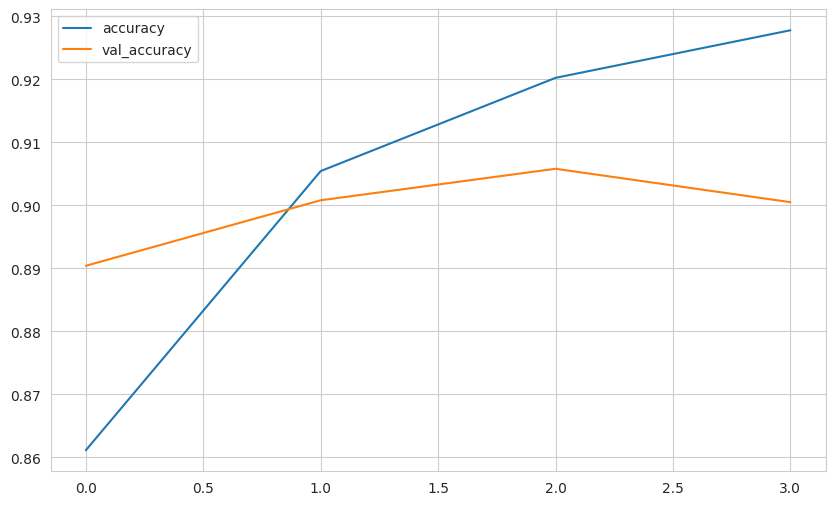

In [54]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [55]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [56]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2859 - accuracy: 0.9008


[0.2859385907649994, 0.9007999897003174]

In [57]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2859385907649994
Test accuracy: 0.9007999897003174


In [58]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[0.00000054, 0.00000019, 0.0000017 , ..., 0.00090551, 0.00000218,
        0.99317026],
       [0.00000616, 0.        , 0.9999919 , ..., 0.        , 0.        ,
        0.        ],
       [0.00000049, 0.9999993 , 0.00000001, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00000657, 0.        , 0.00000041, ..., 0.00000017, 0.99939954,
        0.00000056],
       [0.00000005, 0.999998  , 0.00000006, ..., 0.        , 0.        ,
        0.        ],
       [0.00085074, 0.00000208, 0.00172367, ..., 0.00545854, 0.00062673,
        0.00079996]], dtype=float32)

In [59]:
np.argmax(pred_prob[0])

9

In [60]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.84      0.86      0.85      1000
           3       0.87      0.94      0.90      1000
           4       0.88      0.79      0.83      1000
           5       0.95      0.99      0.97      1000
           6       0.72      0.71      0.71      1000
           7       0.96      0.95      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [62]:
print(confusion_matrix(y_test, y_pred))

[[869   0   7  21   2   2  98   0   1   0]
 [  4 971   2  18   2   0   2   0   1   0]
 [ 22   0 860  12  48   0  58   0   0   0]
 [ 15   2   7 940   8   0  27   0   1   0]
 [  1   1  80  45 790   0  83   0   0   0]
 [  0   0   0   0   0 991   0   7   0   2]
 [132   1  69  36  49   0 706   0   7   0]
 [  0   0   0   0   0  23   0 954   0  23]
 [  3   0   1   7   1   7   5   3 973   0]
 [  0   0   0   0   0  19   1  26   0 954]]


<Axes: >

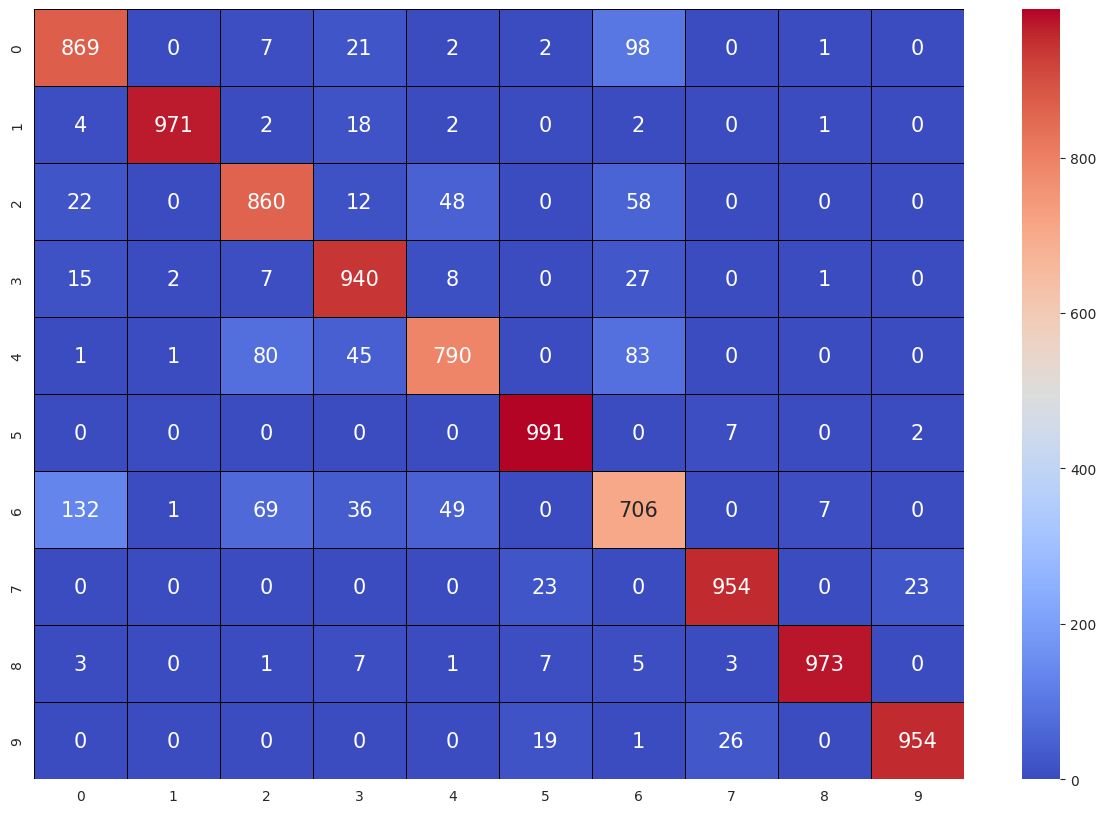

In [63]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="coolwarm", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [64]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [65]:
(y_test != y_pred).sum()

992

In [66]:
np.equal(y_test, y_pred).sum()

9008

## Prediction

In [73]:
my_number = X_test[4]

In [74]:
my_number.shape

(28, 28, 1)

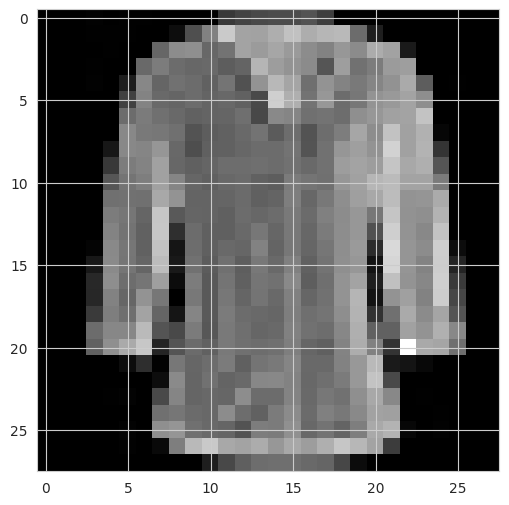

In [75]:
plt.imshow(my_number, cmap="gray")
plt.show()

In [76]:
pred_prob = model.predict(my_number.reshape(1,28,28,1)) 
pred_prob

1/1 [==============================] - 0s 162ms/step


array([[0.02473016, 0.00000116, 0.00102618, 0.00043925, 0.00021958,
        0.00000016, 0.97356015, 0.00000002, 0.00002324, 0.00000016]],
      dtype=float32)

In [77]:
y_pred = np.argmax(pred_prob)
y_pred

6

In [78]:
model.save("assignment2.h5")

In [79]:
model=tf.keras.models.load_model("assignment2.h5")

In [80]:
X_test[16].shape

(28, 28, 1)

In [81]:
pred=model.predict(np.expand_dims(X_test[16],axis=0))

1/1 [==============================] - 0s 56ms/step


In [82]:
np.argmax(pred)

2

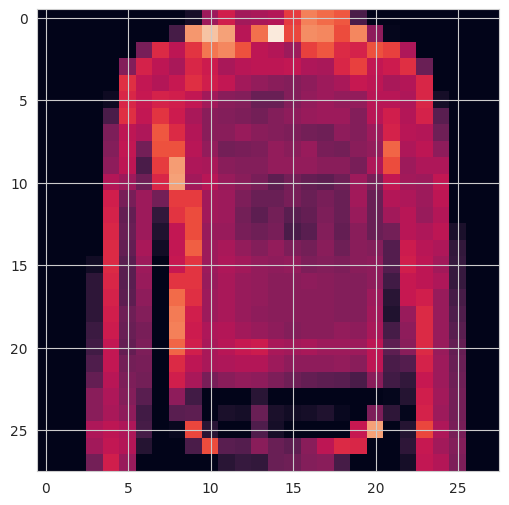

In [83]:
plt.imshow(X_test[16].reshape(28,28))

In [84]:
classes[int(np.argmax(pred, axis=1))]

'Pullover'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___